Start with importing modules and make the graph bigger

In [1]:
from distributions import *
import numpy as np
import matplotlib.pyplot as plt

# make plots bigger and better
plt.figure(figsize=(5,5), dpi=160)

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

# Distribution plots from `distributions` module

## Normal distribution 

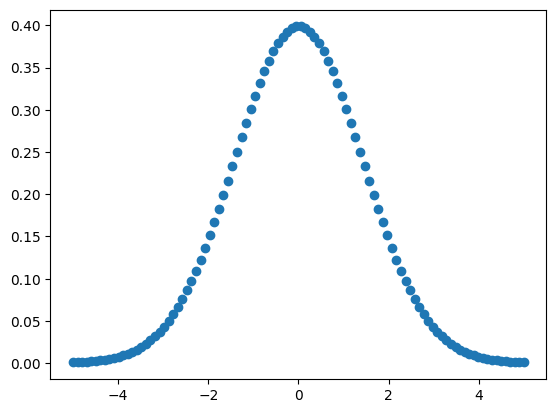

In [2]:
limit = 5
domain = np.linspace(-limit, limit, 100)
mu = 0
variance = 1
distribution = dist_normal(mu, variance)(domain)
plt.scatter(domain, distribution)

## Poisson distribution

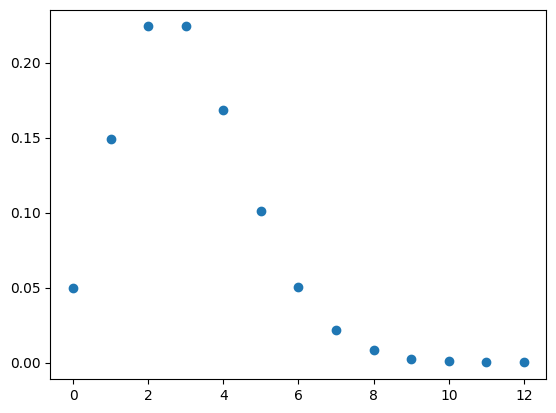

In [3]:
limit = 13
lambda_p = 3
domain = np.arange(limit)
distribution  = dist_poisson(lambda_p)(domain)
plt.scatter(domain, distribution)

## Uniform distribution

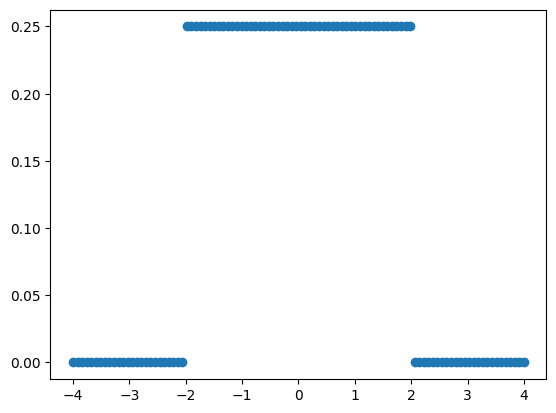

In [4]:
limit = 4
a = -2
b = 2
domain = np.linspace(-limit, limit, 100)
distribution = dist_uniform(a,b)(domain)
plt.scatter(domain, distribution)

## Binomial distribution

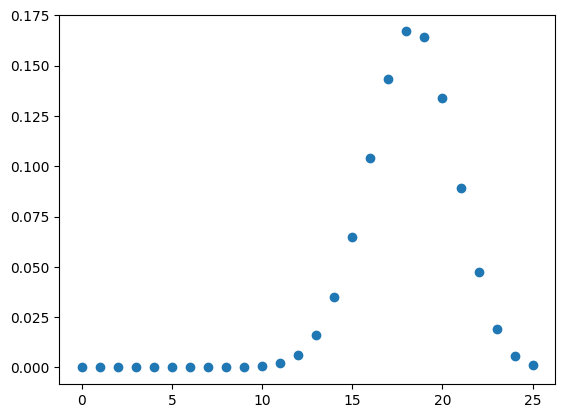

In [5]:
n = 25+1
p = .7
x = np.arange(n)
y = dist_binomial(n, p)(x)
plt.scatter(x, y)

## Geometric distribution

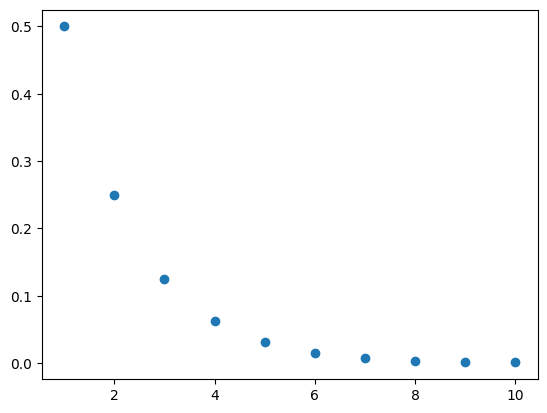

In [6]:
a = 10+1
p = .5
x = np.arange(1, a)
y = dist_geometric(p)(x)
plt.scatter(x, y)

# Next, let's see if we can answer the questions from a lecture

## First, we test distribution of $X \sim U(0,1)$ and $Y \sim X^2$. 
Specifically, if the distribution of Y is uniform.

First, we create and plot distributions

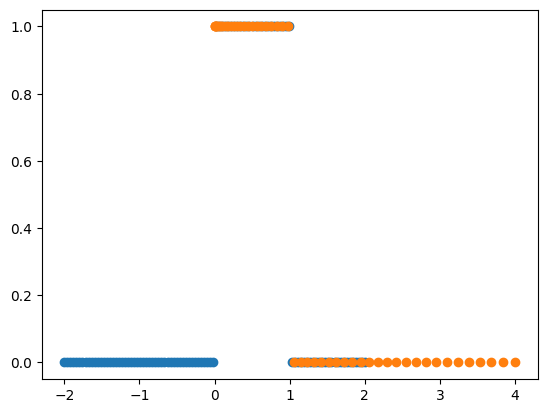

In [7]:
limit = 2
num = 100
domain_x = np.linspace(-limit, limit, num)
distribution_x = dist_uniform(0,1)(domain_x)

def g(x): return np.power(x,2)

domain_y, distribution_y = rand_var_transform(domain_x, distribution_x, g)
plt.scatter(domain_x, distribution_x)
plt.scatter(domain_y, distribution_y)

And now, we plot a CDF of both distributions

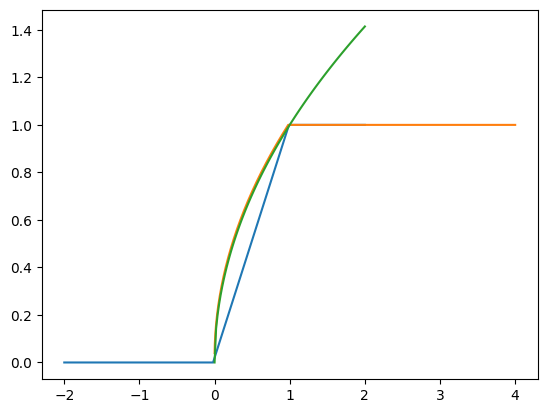

In [8]:
plt.plot(domain_x, discrete_cdf(distribution_x))
plt.plot(domain_y, discrete_cdf(distribution_y))
plt.plot(np.linspace(0,2, 100), np.sqrt(np.linspace(0,2, 100)))

Notice, that the distribution of $Y$ is closely following the $y = \sqrt{x}$ 

## Let's test the change in $X \sim N(0,1), Y \sim X^2$

Again, we create distributions and plot them

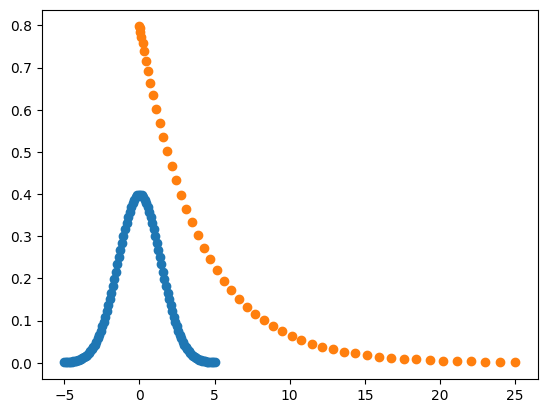

In [9]:
limit = 5
domain_x = np.linspace(-limit, limit, 100)
distribution_x = dist_normal(0, 1)(domain_x)
domain_y, distribution_y = rand_var_transform(domain_x, distribution_x, g)
plt.scatter(domain_x, distribution_x)
plt.scatter(domain_y, distribution_y)

And plot the CDF of both

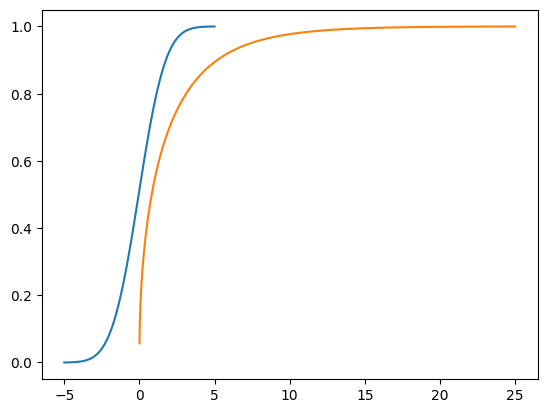

In [10]:
plt.plot(domain_x, discrete_cdf(distribution_x))
plt.plot(domain_y, discrete_cdf(distribution_y))

# A quick detour to observe, how continous convolution leads to a normal distribution.

First, let's do a quick practical example: A sum of 2 rolls of dice. A table
below shows all possible cases:

In [11]:
print("/ ", end='')
print("\t".join(str(i) for i in range(1, 6+1)))
for j in range(1,6+1):
    print(j, end=' ') 
    print("\t".join(str(i+j) for i in range(1, 6+1)))    

/ 1	2	3	4	5	6
1 2	3	4	5	6	7
2 3	4	5	6	7	8
3 4	5	6	7	8	9
4 5	6	7	8	9	10
5 6	7	8	9	10	11
6 7	8	9	10	11	12


We can also get the same result if we convolve probabilities of each result.

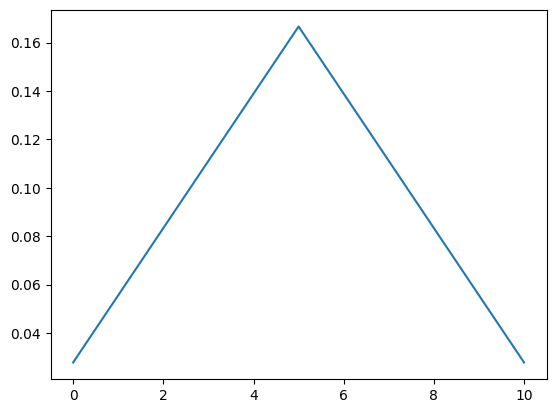

In [12]:
x = np.array([1/6]*6)
y = np.array([1/6]*6)
result = np.convolve(x,y)
base = np.arange(result.size)
plt.plot(base, result)

This shows a linear drop in probability of each sum. However, what will happen 
if we change the setup to rolling $n$ number of dice? How will probability
density of each sum change?

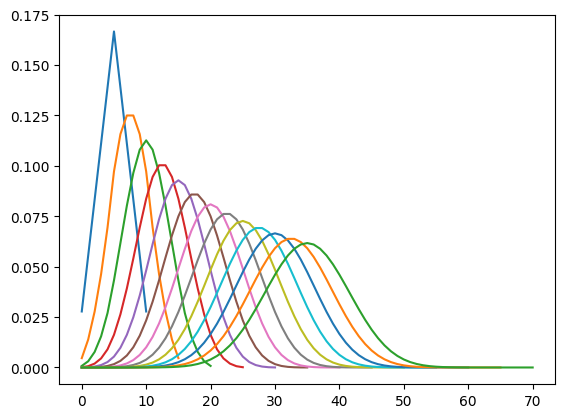

In [13]:
x = np.array([1/6]*6)
result = np.array([1/6]*6)
for _ in range(13):
    result = np.convolve(result,x)
    base = np.arange(result.size)
    plt.plot(base, result)

As one can see, that as $n$ increases, the peak gets smaller, the mean shifts 
to the right, and the overall distribution follows the normal distribution with
higher precision.

# A 2D normal distribution!

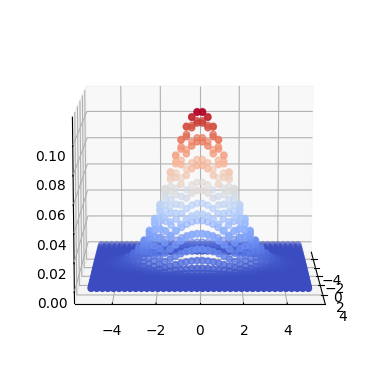

In [14]:
a = 5
precision = 40
vx = np.linspace(-a,a, precision)
vy = np.linspace(-a,a, precision)
X = cartesian_prod(vx,vy)

m = np.array([0,0])
c = np.array([[1,0],
              [0,2]])
z = dist_multivariable_normal(m,c)(X)
domain = np.transpose(X)

ax = plt.axes(projection='3d')
ax.scatter(domain[0], domain[1], z, 
           c=z, cmap="coolwarm")
ax.view_init(10, 0)